In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# use OpenCV to read dimensional values of image
f_grey = cv2.imread("wolves.png", cv2.IMREAD_GRAYSCALE)
# cv2.imshow("image", img)
# cv2.waitKey(0)
print('Shape: ', f_grey.shape)
print('Size: ', f_grey.size)

Shape:  (539, 1500)
Size:  808500


[[0.         0.         0.         ... 0.08235294 0.08235294 0.08235294]
 [0.         0.         0.         ... 0.08235294 0.08235294 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.45490196 0.45490196 0.45490196 ... 0.13333333 0.13333333 0.15294118]
 [0.41960784 0.41960784 0.41960784 ... 0.16862745 0.16862745 0.18039216]
 [0.40392157 0.40392157 0.40392157 ... 0.15294118 0.15294118 0.15294118]]


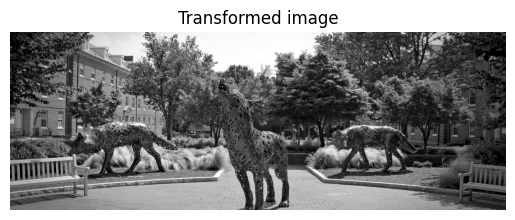

In [3]:
# scale the grey image to the range [0, 1]
L = 2
I_min = np.min(f_grey)
I_max = np.max(f_grey)

# Apply the intensity transformation function
f = (f_grey - I_min) * ((L - 1) / (I_max - I_min))
print(f)

plt.title("Transformed image")
plt.imshow(f, cmap="gray")
plt.axis('off')
plt.show()

In [4]:
def DFT2(image):
    # Apply 1D FFT along rows
    F_row = np.fft.fft(image, axis=0)
    # Apply 1D FFT along columns
    F = np.fft.fft(F_row, axis=1)
    return F

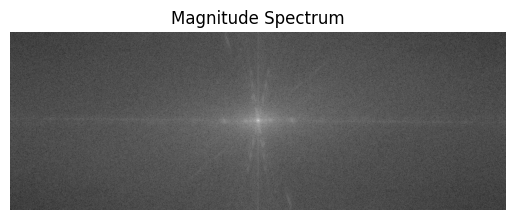

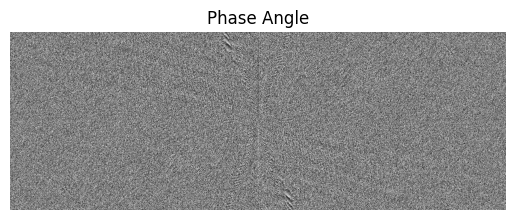

In [5]:
# Perform the 2D DFT on the normalized grayscale image
F = DFT2(f)

# Compute the magnitude spectrum and phase angle
magnitude_spectrum = np.log(1 + np.abs(F))
phase_angle = np.angle(F)

plt.imshow(np.fft.fftshift(magnitude_spectrum), cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')
plt.show()

plt.imshow(np.fft.fftshift(phase_angle), cmap='gray')
plt.title("Phase Angle")
plt.axis('off')
plt.show()


In [6]:
def IDFT2(F):
    # Apply 1D IFFT along columns
    g_col = np.fft.ifft(F, axis=1)
    # Apply 1D IFFT along rows
    g = np.fft.ifft(g_col, axis=0)
    return np.real(g)  # Return the real part

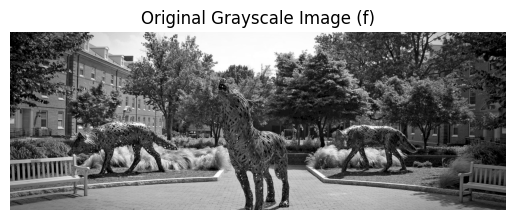

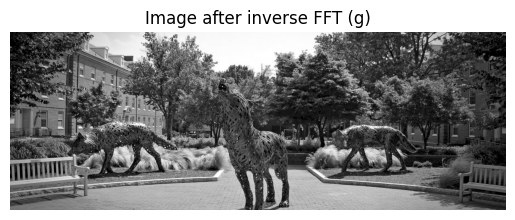

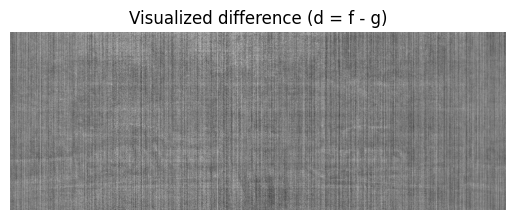

In [7]:
# Perform the inverse 2D DFT on F
g = IDFT2(F)

# Compute the difference
d = f - g

plt.imshow(f, cmap='gray')
plt.title("Original Grayscale Image (f)")
plt.axis('off')
plt.show()

plt.imshow(g, cmap='gray')
plt.title("Image after inverse FFT (g)")
plt.axis('off')
plt.show()

plt.imshow(d, cmap='gray')
plt.title("Visualized difference (d = f - g)")
plt.axis('off')
plt.show()
